<a href="https://colab.research.google.com/github/putriwahyni/5210411231_PUTRI-WAHYUNI/blob/main/Project%20Travelling%20Salesman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Soft computing Project--Part 2

Travelling Salesman

Nama: Putri Wahyuni

NIM: 5210411231

# Map



In [ ]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

united_states_map = mpimg.imread("/content/pulau jawa.png")
def show_cities(path, w=12, h=8):
    """Plot a TSP path overlaid on a map of the US States & their capitals."""
    if isinstance(path, dict):      path = list(path.values())
    if isinstance(path[0][0], str): path = [ item[1] for item in path ]
    plt.imshow(united_states_map)
    for city_name, (x0, y0) in cities:  # Unpack city name and coordinates
        plt.plot(x0, y0, 'y*', markersize=15)  # y* = yellow star for starting point
        plt.text(x0 + 5, y0, city_name, color='black', fontsize=8)  # Add city name as text
    plt.axis("off")
    fig = plt.gcf()
    fig.set_size_inches([w, h])


def show_path(path, starting_city=None, w=12, h=8):
    """Plot a TSP path overlaid on a map of the US States & their capitals."""
    if isinstance(path, dict):      path = list(path.values())
    if isinstance(path[0][0], str): path = [ item[1] for item in path ]

    starting_city = starting_city or path[0]
    x, y = list(zip(*path))
    #_, (x0, y0) = starting_city
    (x0, y0) = starting_city
    plt.imshow(united_states_map)
    # plt.plot(x0, y0, 'y*', markersize=15)  # y* = yellow star for starting point
    plt.plot(x + x[:1], y + y[:1])  # include the starting point at the end of path
    plt.axis("off")
    fig = plt.gcf()
    fig.set_size_inches([w, h])


def polyfit_plot(x,y,deg, **kwargs):
    coefficients = np.polyfit(x,y,deg,**kwargs)
    poly  = np.poly1d(coefficients)
    new_x = np.linspace(x[0], x[-1])
    new_y = poly(new_x)
    plt.plot(x, y, "o", new_x, new_y)
    plt.xlim([x[0]-1, x[-1] + 1 ])

    terms = []
    for p, c in enumerate(reversed(coefficients)):
        term = str(round(c,1))
        if p == 1: term += 'x'
        if p >= 2: term += 'x^'+str(p)
        terms.append(term)
    plt.title(" + ".join(reversed(terms)))

In [ ]:
def distance(xy1, xy2) -> float:
    if isinstance(xy1[0], str): xy1 = xy1[1]; xy2 = xy2[1];               # if xy1 == ("Name", (x,y))
    return math.sqrt( (xy1[0]-xy2[0])**2 + (xy1[1]-xy2[1])**2 )

def path_distance(path) -> int:
    if isinstance(path, dict):      path = list(path.values())            # if path == {"Name": (x,y)}
    if isinstance(path[0][0], str): path = [ item[1] for item in path ]   # if path == ("Name", (x,y))
    return int(sum(
        [ distance(path[i],  path[i+1]) for i in range(len(path)-1) ]
      + [ distance(path[-1], path[0]) ]                                   # include cost of return journey
    ))

30


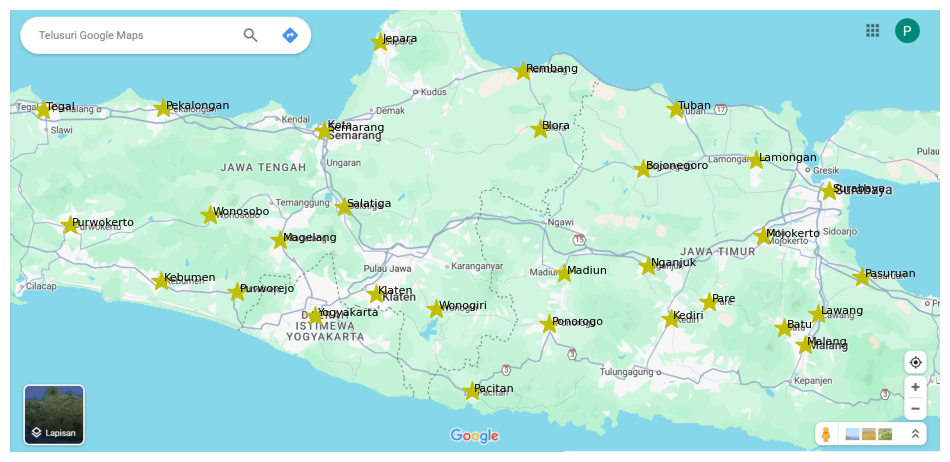

In [ ]:
cities = {
    "Malang": (1541,650),
    "Lawang": (1567,590),
    "Mojokerto": (1461,439),
    "Surabaya": (1589,352),
    "Lamongan": (1447,292),
    "Tuban": (1291,192),
    "Jepara": (717,62),
    "Semarang": (609,235),
    "Salatiga": (647,382),
    "Wonosobo": (387,398),
    "Pekalongan": (297,191),
    "Tegal": (64,194),
    "Purwokerto": (115,418),
    "Kebumen": (293,526),
    "Purworejo": (440,547),
    "Magelang": (524,447),
    "Yogyakarta": (592,594),
    "Klaten": (709,551),
    "Wonogiri": (825,580),
    "Pacitan": (895,740),
    "Ponorogo": (1045,610),
    "Madiun": (1075,511),
    "Blora": (1027,231),
    "Rembang": (995,119),
    "Nganjuk": (1237,496),
    "Kediri": (1281,599),
    "Pare": (1356,566),
    "Bojonegoro": (1227,308),
    "Pasuruan": (1652,518),
    "Batu": (1501,616)
}
cities = list(sorted(cities.items()))
print(len(cities))
show_cities(cities)

19307

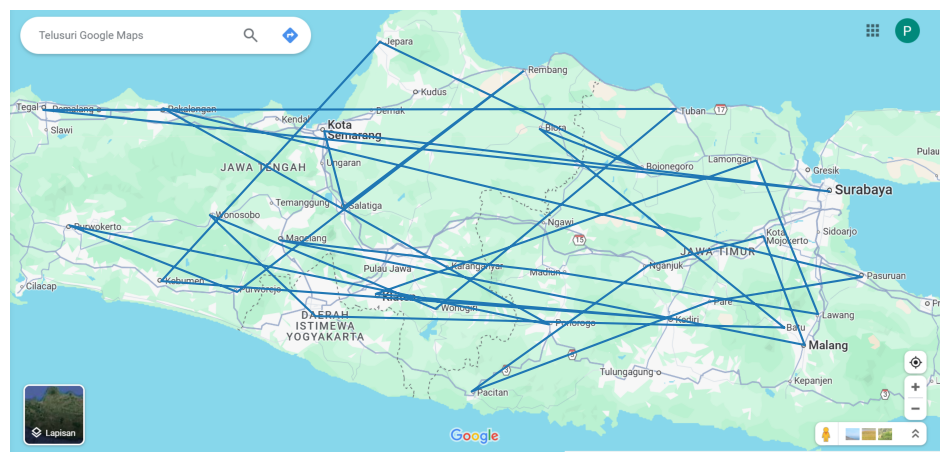

In [ ]:
show_path(cities)
path_distance(cities)

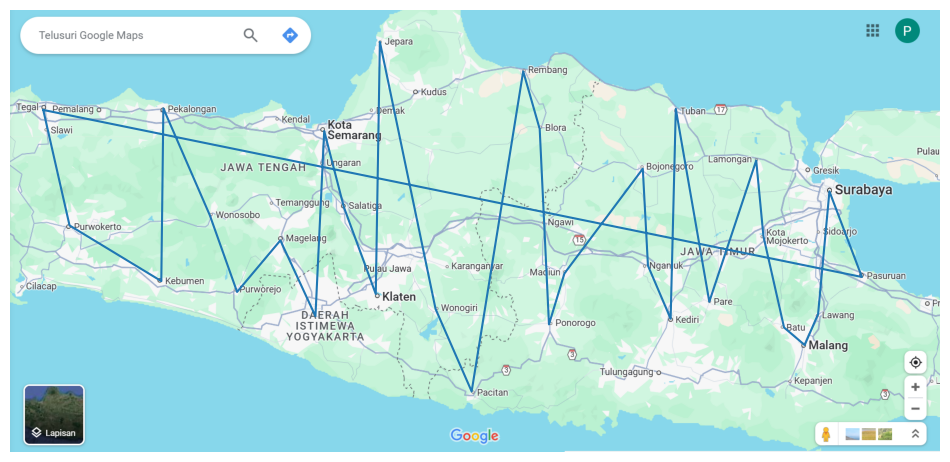

In [ ]:
sorted_cities = sorted(cities, key=lambda city: city[1])
path = [city[1] for city in sorted_cities]
show_path(path)

# Manual

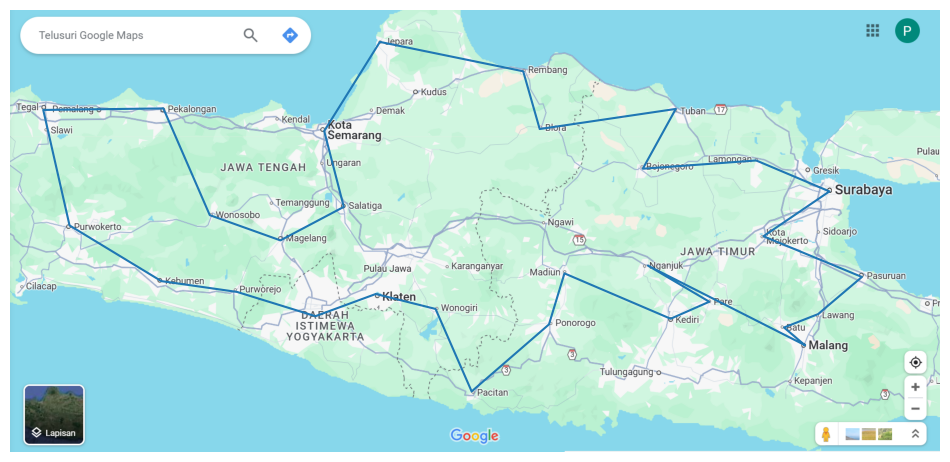

In [ ]:
city_names = ["Malang", "Batu", "Lawang", "Pasuruan", "Mojokerto", "Surabaya", "Lamongan",
    "Bojonegoro", "Tuban", "Blora", "Rembang", "Jepara", "Semarang", "Salatiga",
    "Magelang", "Wonosobo", "Pekalongan", "Tegal", "Purwokerto", "Kebumen", "Purworejo",
    "Yogyakarta", "Klaten", "Wonogiri", "Pacitan", "Ponorogo", "Madiun", "Kediri",
    "Pare", "Nganjuk"]

# Convert the cities list to a dictionary
cities_dict = {city[0]: city[1] for city in cities}

# Now you can access city coordinates using city names
path = [cities_dict[city_name] for city_name in city_names]
show_path(path)

In [ ]:
chunks = [city_names[i:i + 10] for i in range(0, len(city_names), 10)]

for idx, chunk in enumerate(chunks, 1):
    for i, city in enumerate(chunk, 1):
        print(f"{idx*10 - 10 + i}. {city}")

1. Malang
2. Batu
3. Lawang
4. Pasuruan
5. Mojokerto
6. Surabaya
7. Lamongan
8. Bojonegoro
9. Tuban
10. Blora
11. Rembang
12. Jepara
13. Semarang
14. Salatiga
15. Magelang
16. Wonosobo
17. Pekalongan
18. Tegal
19. Purwokerto
20. Kebumen
21. Purworejo
22. Yogyakarta
23. Klaten
24. Wonogiri
25. Pacitan
26. Ponorogo
27. Madiun
28. Kediri
29. Pare
30. Nganjuk


# Metode Ant Colony Optimization

In [ ]:
import numpy as np
import random
import time
from itertools import chain
from typing import Any, Callable, List, Tuple, Union

class AntColonySolver:
    def __init__(
        self,
        cost_fn: Callable[[Any, Any], Union[float, int]],             #Paramater
        time=0,
        min_time=0,
        timeout=0,
        stop_factor=2,
        min_round_trips=10,
        max_round_trips=0,
        min_ants=0,
        max_ants=0,
        ant_count=64,
        ant_speed=1,
        distance_power=1,
        pheromone_power=1.25,
        decay_power=0,
        reward_power=0,
        best_path_smell=2,
        start_smell=0,
        verbose=False,
    ):
        assert callable(cost_fn), "fuction"
        self.cost_fn = cost_fn

        self.time = int(time)
        self.min_time = int(min_time)
        self.timeout = int(timeout)
        self.stop_factor = float(stop_factor)
        self.min_round_trips = int(min_round_trips)
        self.max_round_trips = int(max_round_trips)
        self.min_ants = int(min_ants)
        self.max_ants = int(max_ants)
        self.ant_count = int(ant_count)
        self.ant_speed = int(ant_speed)
        self.distance_power = float(distance_power)
        self.pheromone_power = float(pheromone_power)
        self.decay_power = float(decay_power)
        self.reward_power = float(reward_power)
        self.best_path_smell = float(best_path_smell)
        self.start_smell = float(start_smell or 10**self.distance_power)
        self.verbose = bool(verbose)
        self._initalized = False

        if self.min_round_trips and self.max_round_trips:
            self.min_round_trips = min(self.min_round_trips, self.max_round_trips)
        if self.min_ants and self.max_ants:
            self.min_ants = min(self.min_ants, self.max_ants)

    def solve_initialize(self, problem_path: List[Any]) -> None:
        #Menginisialisasi data yang dibutuhkan untuk pencarian#
        self.distances = {
            source: {
                dest: self.cost_fn(source, dest) for dest in problem_path
            }
            for source in problem_path
        }
        self.distance_cost = {
            source: {
                dest: 1 / (1 + self.distances[source][dest]) ** self.distance_power
                for dest in problem_path
            }
            for source in problem_path
        }
        self.pheromones = {
            source: {
                dest: self.start_smell for dest in problem_path
            }
            for source in problem_path
        }
        if self.ant_count <= 0:
            self.ant_count = len(problem_path)
        if self.ant_speed <= 0:
            distances = list(chain(*[d.values() for d in self.distances.values()]))
            self.ant_speed = int(np.median(distances) // 5)

        self.ant_speed = max(1, self.ant_speed)
        self.ants_used = 0
        self.epochs_used = 0
        self.round_trips = 0
        self._initalized = True

    def solve(self, problem_path: List[Any], restart=False) -> List[Tuple[int, int]]:
        #Pencarian solusi dengan algoritma koloni semut#
        if restart or not self._initalized:
            self.solve_initialize(problem_path)
        ants = {
            "distance": np.zeros((self.ant_count,), dtype="int32"),
            "path": [[problem_path[0]] for _ in range(self.ant_count)],
            "remaining": [set(problem_path[1:]) for _ in range(self.ant_count)],
            "path_cost": np.zeros((self.ant_count,), dtype="int32"),
            "round_trips": np.zeros((self.ant_count,), dtype="int32"),
        }
        best_path = None
        best_path_cost = np.inf
        best_epochs = []
        epoch = 0
        time_start = time.perf_counter()
        while True:
            epoch += 1

            ants_travelling = ants["distance"] > self.ant_speed
            ants["distance"][ants_travelling] -= self.ant_speed
            if all(ants_travelling):
                continue

            ants_arriving = np.invert(ants_travelling)
            for i in np.where(ants_arriving)[0]:
                this_node = ants["path"][i][-1]
                next_node = self.next_node(ants, i)
                ants["distance"][i] = self.distances[this_node][next_node]
                ants["remaining"][i].discard(this_node)
                ants["path_cost"][i] += ants["distance"][i]
                ants["path"][i].append(next_node)

                if not ants["remaining"][i] and ants["path"][i][0] == ants["path"][i][-1]:
                    self.ants_used += 1
                    self.round_trips = max(self.round_trips, ants["round_trips"][i] + 1)

                    was_best_path = False
                    if ants["path_cost"][i] < best_path_cost:
                        was_best_path = True
                        best_path_cost = ants["path_cost"][i]
                        best_path = ants["path"][i]
                        best_epochs.append(epoch)
                        if self.verbose:
                            print(
                                {
                                    "path_cost": int(ants["path_cost"][i]),
                                    "ants_used": self.ants_used,
                                    "epoch": epoch,
                                    "round_trips": ants["round_trips"][i] + 1,
                                    "clock": int(time.perf_counter() - time_start),
                                }
                            )

                    # Meninggalkan jejak feromon
                    reward = 1
                    if self.reward_power:
                        reward *= (best_path_cost / ants["path_cost"][i]) ** self.reward_power
                    if self.decay_power:
                        reward *= self.round_trips**self.decay_power
                    for path_index in range(len(ants["path"][i]) - 1):
                        this_node = ants["path"][i][path_index]
                        next_node = ants["path"][i][path_index + 1]
                        self.pheromones[this_node][next_node] += reward
                        self.pheromones[next_node][this_node] += reward
                        if was_best_path:
                             # Ratu memerintahkan untuk menggandakan jumlah semut yang mengikuti jalur terbaik ini
                            self.pheromones[this_node][next_node] *= self.best_path_smell
                            self.pheromones[next_node][this_node] *= self.best_path_smell

                    # Reset semut
                    ants["distance"][i] = 0
                    ants["path"][i] = [problem_path[0]]
                    ants["remaining"][i] = set(problem_path[1:])
                    ants["path_cost"][i] = 0
                    ants["round_trips"][i] += 1

            if not best_epochs:
                continue
            clock = time.perf_counter() - time_start

            if self.time and clock > self.time:
                break
            if self.min_time and clock < self.min_time:
                continue
            if self.timeout and clock > self.timeout:
                break
            if self.min_round_trips and self.round_trips < self.min_round_trips:
                continue
            if self.max_round_trips and self.round_trips >= self.max_round_trips:
                break
            if self.min_ants and self.ants_used < self.min_ants:
                continue
            if self.max_ants and self.ants_used >= self.max_ants:
                break
            if self.stop_factor and epoch > (best_epochs[-1] * self.stop_factor):
                break

        self.epochs_used = epoch
        self.round_trips = np.max(ants["round_trips"])
        return best_path

    def next_node(self, ants, index):
        """Menentukan node berikutnya yang akan dikunjungi semut"""
        this_node = ants["path"][index][-1]
        weights = []
        weights_sum = 0
        if not ants["remaining"][index]: return ants["path"][index][0]
        for next_node in ants["remaining"][index]:
            if next_node == this_node: continue
            reward = (
                self.pheromones[this_node][next_node] ** self.pheromone_power
                * self.distance_cost[this_node][next_node]
            )
            weights.append((reward, next_node))
            weights_sum += reward
        rand = random.random() * weights_sum
        for weight, next_node in weights:
            if rand > weight:
                rand -= weight
            else:
                break
        return next_node

def AntColonyRunner(cities, verbose=False, plot=False, label={}, algorithm=AntColonySolver, **kwargs):
    """Menjalankan algoritma koloni semut untuk menyelesaikan masalah"""
    solver = algorithm(cost_fn=distance, verbose=verbose, **kwargs)
    result = solver.solve(cities)
    print(f"Total distance: {path_distance(result)}")

    if label:
        kwargs = {**label, **kwargs}

    print(" → ".join([city[0] for city in result]))

    for key in ['verbose', 'plot', 'animate', 'label', 'min_time', 'max_time']:
        if key in kwargs: del kwargs[key]

    if plot:
        show_path(result)
    return result

{'path_cost': 11248, 'ants_used': 1, 'epoch': 10777, 'round_trips': 1, 'clock': 0}
{'path_cost': 11014, 'ants_used': 2, 'epoch': 10863, 'round_trips': 1, 'clock': 0}
{'path_cost': 9626, 'ants_used': 65, 'epoch': 20542, 'round_trips': 2, 'clock': 0}
{'path_cost': 9316, 'ants_used': 67, 'epoch': 21140, 'round_trips': 2, 'clock': 0}
{'path_cost': 9278, 'ants_used': 80, 'epoch': 22996, 'round_trips': 2, 'clock': 0}
{'path_cost': 8257, 'ants_used': 128, 'epoch': 29327, 'round_trips': 3, 'clock': 0}
{'path_cost': 8144, 'ants_used': 132, 'epoch': 30998, 'round_trips': 3, 'clock': 0}
{'path_cost': 7808, 'ants_used': 140, 'epoch': 31680, 'round_trips': 3, 'clock': 0}
{'path_cost': 7073, 'ants_used': 169, 'epoch': 33653, 'round_trips': 3, 'clock': 0}
{'path_cost': 5617, 'ants_used': 193, 'epoch': 37119, 'round_trips': 4, 'clock': 0}
{'path_cost': 5408, 'ants_used': 208, 'epoch': 39348, 'round_trips': 4, 'clock': 0}
{'path_cost': 4998, 'ants_used': 348, 'epoch': 53326, 'round_trips': 6, 'clock': 

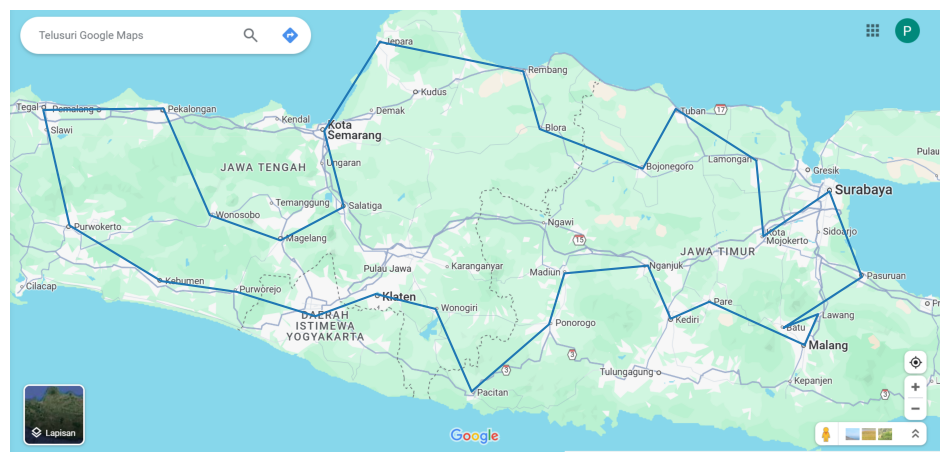

In [ ]:
results = AntColonyRunner(cities, distance_power=1, verbose=True, plot=True)

Hyperparameter selanjutnya, Grafis yang dihasilkan lebih banyak loop dan sudut tajam, tetapi jalurnya cukup baik untuk mencegah semut liar kelaparan. Namun, algoritma ini terkadang berhenti terlalu cepat, sehingga perlu tambahan kondisi terminasi seperti min_ants.

{'path_cost': 10155, 'ants_used': 1, 'epoch': 10105, 'round_trips': 1, 'clock': 0}
{'path_cost': 8013, 'ants_used': 65, 'epoch': 18652, 'round_trips': 2, 'clock': 0}
{'path_cost': 7933, 'ants_used': 200, 'epoch': 41283, 'round_trips': 4, 'clock': 0}
{'path_cost': 6602, 'ants_used': 255, 'epoch': 48353, 'round_trips': 5, 'clock': 0}
{'path_cost': 6570, 'ants_used': 397, 'epoch': 66492, 'round_trips': 7, 'clock': 0}
{'path_cost': 6102, 'ants_used': 406, 'epoch': 67395, 'round_trips': 7, 'clock': 0}
{'path_cost': 5730, 'ants_used': 437, 'epoch': 70679, 'round_trips': 7, 'clock': 0}
{'path_cost': 5453, 'ants_used': 480, 'epoch': 74882, 'round_trips': 8, 'clock': 0}
{'path_cost': 5381, 'ants_used': 486, 'epoch': 75565, 'round_trips': 8, 'clock': 0}
{'path_cost': 5296, 'ants_used': 494, 'epoch': 76146, 'round_trips': 9, 'clock': 0}
{'path_cost': 5279, 'ants_used': 587, 'epoch': 85297, 'round_trips': 10, 'clock': 1}
{'path_cost': 5270, 'ants_used': 632, 'epoch': 89155, 'round_trips': 11, 'clo

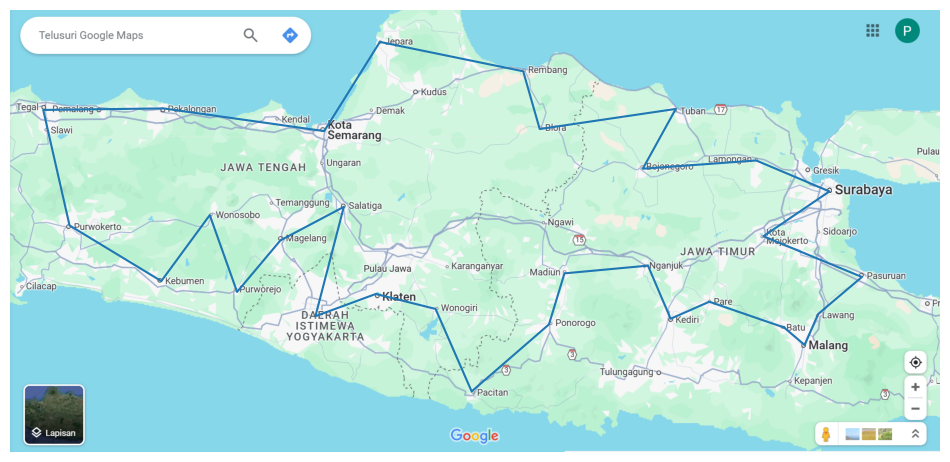

In [ ]:
results = AntColonyRunner(cities, distance_power=1, min_time=100, verbose=True, plot=True, reward_power=2)